[texto do link](https://)#Objetivo Geral
Aplicar técnicas de Mineração de Dados para identificar padrões de associação em transações comerciais, utilizando o algoritmo Apriori. Escolher com uma base de dados mais robusta, implementando funções personalizadas para cálculo de suporte, confiança e lift.

## Instale a biblioteca do Apyori

In [1]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=a2bb597b775f72ec804a981579416c5150ce797a6c2d1afc1da5e8d85cc633fa
  Stored in directory: /root/.cache/pip/wheels/7f/49/e3/42c73b19a264de37129fadaa0c52f26cf50e87de08fb9804af
Successfully built apyori


## Importe os dados

In [2]:
import pandas as pd



In [10]:
db = pd.read_csv('/content/supermarket data.csv', header=0, engine='python', on_bad_lines='skip', sep=';')

In [11]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266901 entries, 0 to 266900
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      266901 non-null  int64  
 1   Itemname    265893 non-null  object 
 2   Quantity    266900 non-null  float64
 3   Date        266900 non-null  object 
 4   Price       266900 non-null  object 
 5   CustomerID  188631 non-null  float64
 6   Country     266900 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 14.3+ MB


Esta célula agrupa os dados de transação por número de fatura ('BillNo') e cria uma lista de itens ('Itemname') para cada fatura. O resultado é uma lista de listas, onde cada lista interna representa uma transação e contém os itens comprados nessa transação. Este formato é necessário para aplicar o algoritmo Apriori.

In [12]:
# 1. Agrupar os dados pelo ID da Fatura ('Invoice ID')
# 2. Para cada fatura, criar uma lista de todos os produtos ('Product line')
# 3. Converter o resultado em uma lista geral
transactions = db.groupby('BillNo')['Itemname'].apply(list).tolist()

# Vamos ver como ficaram as 5 primeiras transações
print("--- 5 Primeiras Transações (Formato Apriori) ---")
for t in transactions[:5]:
    print(t)

--- 5 Primeiras Transações (Formato Apriori) ---
['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER']
['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT']
['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND']
['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION']
['BATH BUILDING BLOCK WORD']


Esta célula importa a função `encontrar_e_imprimir_regras` de um arquivo Python chamado `encontrar_e_imprimir_regras.py`. Presume-se que este arquivo contenha o código para aplicar o algoritmo Apriori e exibir as regras de associação encontradas.

## Importe a função personalizada

In [13]:
from encontrar_e_imprimir_regras import encontrar_e_imprimir_regras

Esta célula executa a função `encontrar_e_imprimir_regras`, passando a lista de transações (`transactions`) como argumento. Esta função processará as transações, aplicará o algoritmo Apriori e imprimirá as regras de associação descobertas com suas métricas (suporte, confiança e lift).

In [14]:
#encontrar_e_imprimir_regras(lista_transacoes, min_support=0.03, min_confidence=0.6, min_lift=1.1, min_length=2):

encontrar_e_imprimir_regras(transactions,0.01,0.6,1.1,2)

--- Iniciando limpeza dos dados... ---
Dados limpos. 11830 transações prontas para análise.

--- Total de regras encontradas: 292 ---

--- Exibindo 292 Regras Encontradas ---
REGRA: SE comprar [ALARM CLOCK BAKELIKE CHOCOLATE] ENTÃO comprará [ALARM CLOCK BAKELIKE RED]
  Suporte: 1.08%
  Confiança: 67.02%
  Lift: 15.22
------------------------------
REGRA: SE comprar [ALARM CLOCK BAKELIKE GREEN] ENTÃO comprará [ALARM CLOCK BAKELIKE RED]
  Suporte: 2.21%
  Confiança: 63.13%
  Lift: 14.34
------------------------------
REGRA: SE comprar [ALARM CLOCK BAKELIKE IVORY] ENTÃO comprará [ALARM CLOCK BAKELIKE RED]
  Suporte: 1.45%
  Confiança: 66.41%
  Lift: 15.08
------------------------------
REGRA: SE comprar [ALARM CLOCK BAKELIKE ORANGE] ENTÃO comprará [ALARM CLOCK BAKELIKE RED]
  Suporte: 1.67%
  Confiança: 68.4%
  Lift: 15.53
------------------------------
REGRA: SE comprar [PAINTED METAL PEARS ASSORTED] ENTÃO comprará [ASSORTED COLOUR BIRD ORNAMENT]
  Suporte: 1.12%
  Confiança: 68.04%
  Li

## Mostre os dados em um gráfico de barras

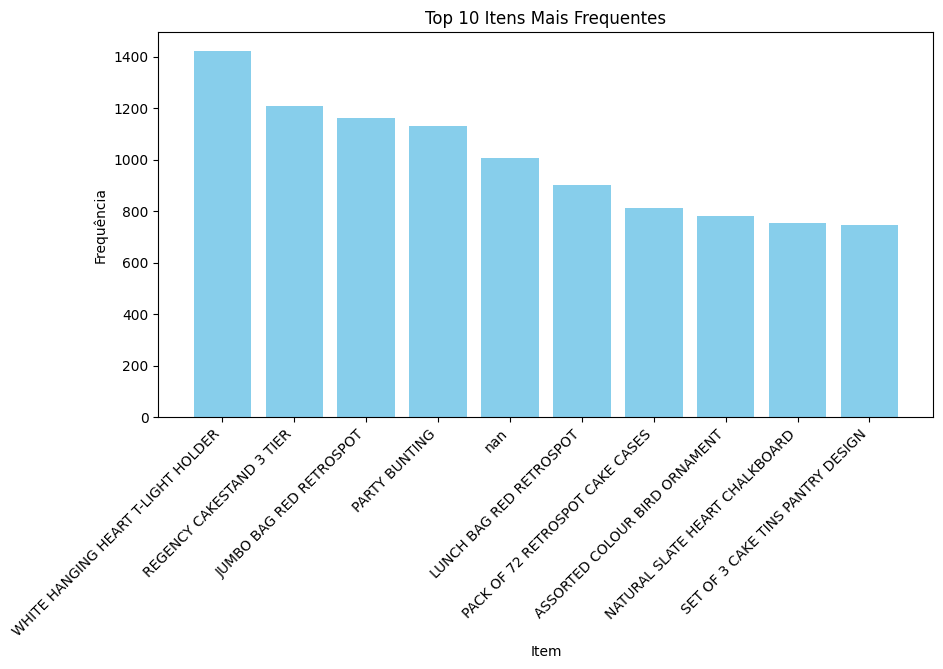

In [19]:
import matplotlib.pyplot as plt
from collections import Counter


itens = [item for transactions in transactions for item in transactions]
contagem = Counter(itens)
mais_frequentes = contagem.most_common(10)

plt.figure(figsize=(10,5))
plt.bar([str(x[0]) for x in mais_frequentes], [x[1] for x in mais_frequentes], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Itens Mais Frequentes')
plt.xlabel('Item')
plt.ylabel('Frequência')
plt.show()
